In [2]:
%pylab inline
from pycheops.models import FactorModel, EclipseModel, ThermalPhaseModel
from lmfit import report_fit

Populating the interactive namespace from numpy and matplotlib


In [3]:
T_0 = 0.5
P = 2.0
a_th = 0.012
b_th = -0.003
c_th = 0.0027
D = 0.02
W = 0.04
S = 0.28

In [4]:
m = ThermalPhaseModel(prefix="_")*EclipseModel()*FactorModel()
pars = m.make_params(T_0=T_0, 
                     _a_th=a_th, _b_th=b_th, _c_th=c_th,
                     D=D, W=W, S=S)
pars['P'].set(value=P, vary=False)
pars['_T_0'].set(expr='T_0')
pars['_P'].set(expr='P')
pars

Parameters([('_T_0', <Parameter '_T_0', 0.5, bounds=[-inf:inf], expr='T_0'>),
            ('_P', <Parameter '_P', 2.0, bounds=[1e-15:inf], expr='P'>),
            ('_a_th', <Parameter '_a_th', 0.012, bounds=[-inf:inf]>),
            ('_b_th', <Parameter '_b_th', -0.003, bounds=[-inf:inf]>),
            ('_c_th', <Parameter '_c_th', 0.0027, bounds=[0:inf]>),
            ('T_0', <Parameter 'T_0', 0.5, bounds=[-inf:inf]>),
            ('P', <Parameter 'P', value=2.0 (fixed), bounds=[1e-15:inf]>),
            ('D', <Parameter 'D', 0.02, bounds=[0:1]>),
            ('W', <Parameter 'W', 0.04, bounds=[0:0.3]>),
            ('S', <Parameter 'S', 0.28, bounds=[0:1]>),
            ('f_c', <Parameter 'f_c', value=0 (fixed), bounds=[-1:1]>),
            ('f_s', <Parameter 'f_s', value=0 (fixed), bounds=[-1:1]>),
            ('a_c', <Parameter 'a_c', value=0 (fixed), bounds=[0:inf]>),
            ('c', <Parameter 'c', 1.0, bounds=[-inf:inf]>),
            ('_A',
             <Parameter '_A', 0.012

(0.5, 2.499000000000002)

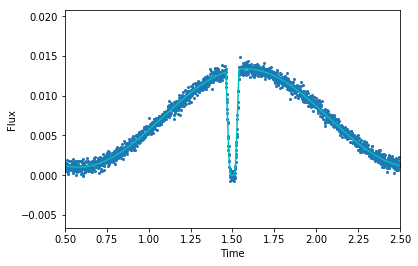

In [5]:
t = np.arange(T_0,T_0 + P, 0.001)
yerr = 450e-6
flux_true = m.eval(params=pars, t=t)
flux = flux_true + normal(0.0, yerr, size=len(t))
fig,ax=subplots()
ax.scatter(t, flux,s=4)
ax.plot(t, flux_true,'c')
ax.set_xlabel('Time')
ax.set_ylabel('Flux')
ax.set_xlim(min(t),max(t))
#ax.set_ylim(0,1.5*pars['_F'].value)


In [6]:
print('Max flux from model = {:0.4f}, F = {:0.4f}'.format(max(flux_true),pars['_Fmax'].value))
print('Phase of maximum flux from model = {:0.4f}, ph_max = {:0.4f}'
      .format((t[argmax(flux_true)]-T_0)/P,pars['_ph_max'].value % 1))
print('Peak-to-trough amplitude from model = {:0.3f}, A = {:0.3f}'
      .format(max(flux_true)-min(flux_true),pars['_A'].value))

Max flux from model = 0.0134, F = 0.0134
Phase of maximum flux from model = 0.5390, ph_max = 0.5390
Peak-to-trough amplitude from model = 0.013, A = 0.012


In [7]:
result = m.fit(flux, pars, t=t, weights=1/yerr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 88
    # data points      = 2000
    # variables        = 8
    chi-square         = 2011.39108
    reduced chi-square = 1.00973448
    Akaike info crit   = 27.3587657
    Bayesian info crit = 72.1659854
[[Variables]]
    _T_0:     0.49990573 == 'T_0'
    _P:       2.00000000 == 'P'
    _a_th:    0.01258269 (init = 0.012)
    _b_th:   -0.00319169 (init = -0.003)
    _c_th:    0.00288370 (init = 0.0027)
    T_0:      0.49990573 (init = 0.5)
    P:        2 (fixed)
    D:        0.02720969 (init = 0.02)
    W:        0.04062058 (init = 0.04)
    S:        0.28994368 (init = 0.28)
    f_c:      0 (fixed)
    f_s:      0 (fixed)
    a_c:      0 (fixed)
    c:        0.95113742 (init = 1)
    _A:       0.01298117 == 'hypot(_a_th,_b_th)'
    _Fmax:    0.01406978 == '_c_th+(_a_th+_b_th+_A)/2'
    _Fmin:    0.00108861 == '_Fmax - _A'
    _ph_max: -0.46046311 == 'arctan2(_b_th,-_a_th)/(2*pi)'
    k:        0.16495360 =

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

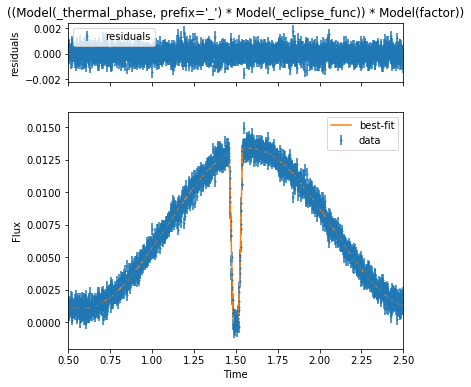

In [8]:
result.plot(xlabel='Time',ylabel='Flux',data_kws={'ms':1},ax_fit_kws={'xlim':[min(t),max(t)]})